# scikit-learn-k-means

Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

## The K-Means Clusterting Algorithm: Expectation Maximization

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.
*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
A. Assign points to the nearest cluster center
B. Set the cluster centers to the mean 
   
Let's visualize this process:

<img src="kmeans.gif" style="float: left; margin-right: 10px;" />

https://www.projectrhea.org/rhea/index.php/SlectureDavidRunyanCS662Spring14


### Load Iris dataset

In [2]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

### Conduct PCA to reduce 4 feature dimensions to 2 dimentions for visualization purpose

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


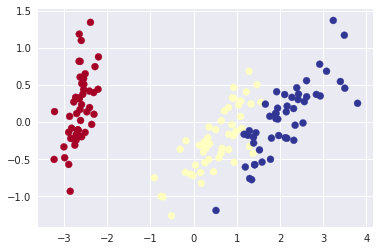

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, # 3 colors: 3 different Iris flower types (targets)
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

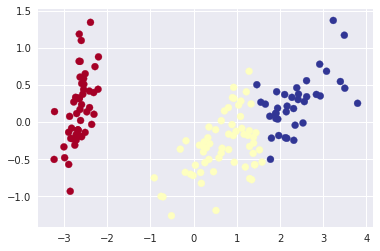

In [7]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=2) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, # 3 colors: Kmeans centers (unsupervised, targets unknown)
           cmap='RdYlBu');

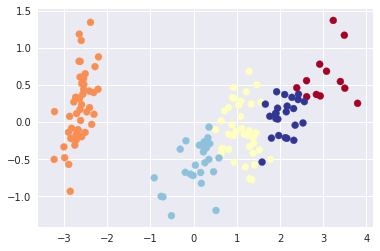

In [8]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=2) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

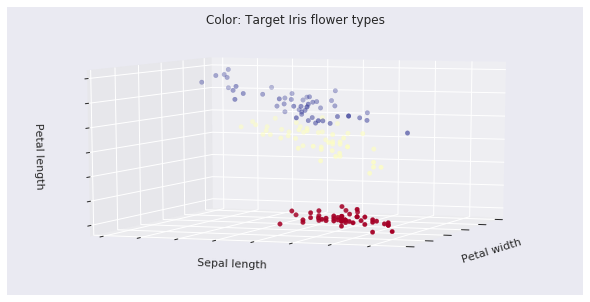

Result: 134 out of 150 samples were correctly labeled.


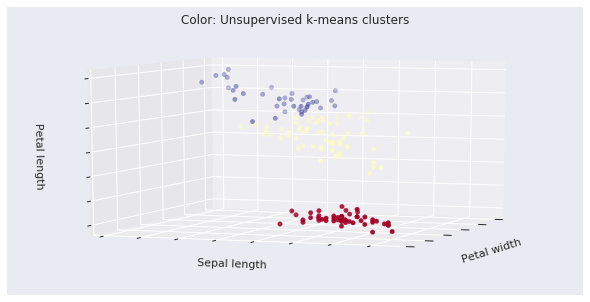

In [9]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from mpl_toolkits.mplot3d import Axes3D

# note: I deliberately chose a random seed that ends up 
# labeling the clusters with the same color (numbering convention) as the original y values 
np.random.seed(2)

# load data
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

# do the clustering
k_means = cluster.KMeans(n_clusters=3, random_state=2)
k_means.fit(X_iris) 
labels = k_means.labels_


# plot the Iris types in color
fig = plt.figure(1, figsize=(8, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()
# ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels.astype(np.float), cmap='RdYlBu')
ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=y_iris.astype(np.float), cmap='RdYlBu')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Color: Target Iris flower types')
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
# ax.set_ylabel('Sepal width') # X_iris[:, 1]
ax.set_zlabel('Petal length')
plt.show()


# check how many of the samples were correctly labeled
correct_labels = sum(y_iris == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_iris.size))


# plot the k-means clusters in color
fig = plt.figure(1, figsize=(8, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()
ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels.astype(np.float), cmap='RdYlBu')
# ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=y_iris.astype(np.float), cmap='RdYlBu')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Color: Unsupervised k-means clusters')
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
# ax.set_ylabel('Sepal width') # X_iris[:, 1]
ax.set_zlabel('Petal length')
plt.show()

---

### K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

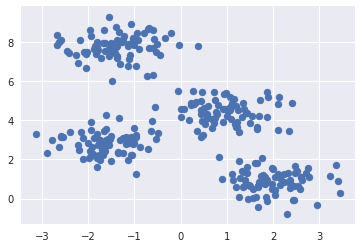

In [10]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

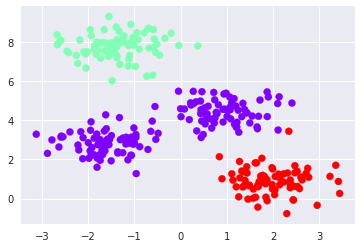

In [13]:
from sklearn.cluster import KMeans
est = KMeans(3)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

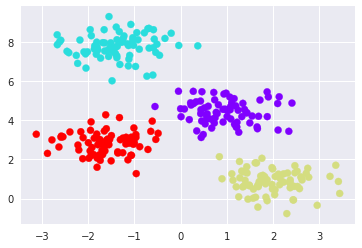

In [14]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!
This algorithm will (often) converge to the optimal cluster centers.

---